In [51]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Read csv file as DataFrame, with the first column as row index
df_weather = pd.read_csv("data/cle_col_cin_weather_2022-2024.csv",
                 index_col="Date",
                 parse_dates=True
                )


# Preview the dataset
df_weather.head()

,Max Temp,Min Temp,Ave Temp,Depature Temp,HDD,CDD,precip,New Snow,Snow Depth,State,City
Date,,,,,,,,,,,
2022-01-01,54,37,45.5,14.9,19,0,0.44,T,0,Ohio,Cleveland
2022-01-02,37,25,31.0,0.6,34,0,0.13,0.4,T,Ohio,Cleveland
2022-01-03,28,22,25.0,-5.2,40,0,T,T,T,Ohio,Cleveland
2022-01-04,40,23,31.5,1.4,33,0,0,0,T,Ohio,Cleveland
2022-01-05,42,17,29.5,-0.4,35,0,T,T,0,Ohio,Cleveland


In [141]:
# Read csv file as DataFrame, with the first column as row index
df_disease = pd.read_csv("data/NNDSS_Weekly_Data_20240710.csv"
                )

# Preview the dataset
df_disease.head()

,Reporting Area,Current MMWR Year,MMWR WEEK,Label,Current week,"Current week, flag",Previous 52 week Max,"Previous 52 weeks Max, flag",Cumulative YTD Current MMWR Year,"Cumulative YTD Current MMWR Year, flag",Cumulative YTD Previous MMWR Year,"Cumulative YTD Previous MMWR Year, flag",LOCATION1,LOCATION2,sort_order,geocode
0,US RESIDENTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,US RESIDENTS,20221000001,NaN
1,NEW ENGLAND,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,NEW ENGLAND,20221000002,NaN
2,CONNECTICUT,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,CONNECTICUT,NaN,20221000003,POINT (-72.738288 41.575155)
3,MAINE,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MAINE,NaN,20221000004,POINT (-69.06137 45.117911)
4,MASSACHUSETTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MASSACHUSETTS,NaN,20221000005,POINT (-71.481104 42.151077)


In [142]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002120 entries, 0 to 1002119
Data columns (total 16 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Reporting Area                           1002120 non-null  object 
 1   Current MMWR Year                        1002120 non-null  int64  
 2   MMWR WEEK                                1002120 non-null  int64  
 3   Label                                    1002120 non-null  object 
 4   Current week                             96240 non-null    float64
 5   Current week, flag                       1002120 non-null  object 
 6   Previous 52 week Max                     892038 non-null   float64
 7   Previous 52 weeks Max, flag              1002120 non-null  object 
 8   Cumulative YTD Current MMWR Year         320243 non-null   float64
 9   Cumulative YTD Current MMWR Year, flag   1002120 non-null  object 
 10  Cumulative YTD Pre

In [143]:
# function to convert year and week to a date
def week_to_date(year, week):
    # Get the first day of the year
    first_day_of_year = dt.datetime(year, 1, 1)
    
    # Calculate the first Monday of the year
    first_monday = first_day_of_year + dt.timedelta(days=(7 - first_day_of_year.weekday()) % 7)
    
    # Calculate the desired date by adding the weeks
    desired_date = first_monday + dt.timedelta(weeks=week-1)
    
    return desired_date.date()  # Return a date object

In [144]:
# create date column from year and week function
df_disease[['date']] = df_disease.apply(lambda row: pd.Series(week_to_date(row['Current MMWR Year'], row['MMWR WEEK'])), axis=1)

In [145]:
df_disease.head()

,Reporting Area,Current MMWR Year,MMWR WEEK,Label,Current week,"Current week, flag",Previous 52 week Max,"Previous 52 weeks Max, flag",Cumulative YTD Current MMWR Year,"Cumulative YTD Current MMWR Year, flag",Cumulative YTD Previous MMWR Year,"Cumulative YTD Previous MMWR Year, flag",LOCATION1,LOCATION2,sort_order,geocode,date
0,US RESIDENTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,US RESIDENTS,20221000001,NaN,2022-03-07
1,NEW ENGLAND,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,NEW ENGLAND,20221000002,NaN,2022-03-07
2,CONNECTICUT,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,CONNECTICUT,NaN,20221000003,POINT (-72.738288 41.575155),2022-03-07
3,MAINE,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MAINE,NaN,20221000004,POINT (-69.06137 45.117911),2022-03-07
4,MASSACHUSETTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MASSACHUSETTS,NaN,20221000005,POINT (-71.481104 42.151077),2022-03-07


In [156]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002120 entries, 0 to 1002119
Data columns (total 19 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   Reporting Area                           1002120 non-null  object        
 1   Current MMWR Year                        1002120 non-null  int64         
 2   MMWR WEEK                                1002120 non-null  int64         
 3   Label                                    1002120 non-null  object        
 4   Current week                             96240 non-null    float64       
 5   Current week, flag                       1002120 non-null  object        
 6   Previous 52 week Max                     892038 non-null   float64       
 7   Previous 52 weeks Max, flag              1002120 non-null  object        
 8   Cumulative YTD Current MMWR Year         320243 non-null   float64       
 9   Cumulative YT

In [65]:
#set the index to the date_new
#df_disease.set_index('date',inplace=True)

In [147]:
# convert date to datetime
df_disease['date'] = pd.to_datetime(df_disease['date'])

In [150]:
df_disease.head()

,Reporting Area,Current MMWR Year,MMWR WEEK,Label,Current week,"Current week, flag",Previous 52 week Max,"Previous 52 weeks Max, flag",Cumulative YTD Current MMWR Year,"Cumulative YTD Current MMWR Year, flag",Cumulative YTD Previous MMWR Year,"Cumulative YTD Previous MMWR Year, flag",LOCATION1,LOCATION2,sort_order,geocode,date
0,US RESIDENTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,US RESIDENTS,20221000001,NaN,2022-03-07
1,NEW ENGLAND,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,NEW ENGLAND,20221000002,NaN,2022-03-07
2,CONNECTICUT,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,CONNECTICUT,NaN,20221000003,POINT (-72.738288 41.575155),2022-03-07
3,MAINE,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MAINE,NaN,20221000004,POINT (-69.06137 45.117911),2022-03-07
4,MASSACHUSETTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MASSACHUSETTS,NaN,20221000005,POINT (-71.481104 42.151077),2022-03-07


In [151]:
# parse out the geocode to longitude and latitude
df_disease[['longitude', 'latitude']] = df_disease['geocode'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')


In [152]:
# convert longitude and latitude to numeric values
df_disease['longitude'] = pd.to_numeric(df_disease['longitude'])
df_disease['latitude'] = pd.to_numeric(df_disease['latitude'])

In [155]:
df_disease.head()

,Reporting Area,Current MMWR Year,MMWR WEEK,Label,Current week,"Current week, flag",Previous 52 week Max,"Previous 52 weeks Max, flag",Cumulative YTD Current MMWR Year,"Cumulative YTD Current MMWR Year, flag",Cumulative YTD Previous MMWR Year,"Cumulative YTD Previous MMWR Year, flag",LOCATION1,LOCATION2,sort_order,geocode,date,longitude,latitude
0,US RESIDENTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,US RESIDENTS,20221000001,NaN,2022-03-07,NaN,NaN
1,NEW ENGLAND,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,NaN,NEW ENGLAND,20221000002,NaN,2022-03-07,NaN,NaN
2,CONNECTICUT,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,CONNECTICUT,NaN,20221000003,POINT (-72.738288 41.575155),2022-03-07,-72.738288,41.575155
3,MAINE,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MAINE,NaN,20221000004,POINT (-69.06137 45.117911),2022-03-07,-69.061370,45.117911
4,MASSACHUSETTS,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,MASSACHUSETTS,NaN,20221000005,POINT (-71.481104 42.151077),2022-03-07,-71.481104,42.151077


In [157]:
# create dataset for just Ohio
df_disease_ohio = df_disease[df_disease['Reporting Area']=='OHIO']
df_disease_ohio.head()

,Reporting Area,Current MMWR Year,MMWR WEEK,Label,Current week,"Current week, flag",Previous 52 week Max,"Previous 52 weeks Max, flag",Cumulative YTD Current MMWR Year,"Cumulative YTD Current MMWR Year, flag",Cumulative YTD Previous MMWR Year,"Cumulative YTD Previous MMWR Year, flag",LOCATION1,LOCATION2,sort_order,geocode,date,longitude,latitude
17,OHIO,2022,10,Anthrax,NaN,-,0.0,-,NaN,-,NaN,-,OHIO,NaN,20221000018,POINT (-82.70936 40.415534),2022-03-07,-82.70936,40.415534
82,OHIO,2022,10,"Arboviral diseases, Chikungunya virus disease",NaN,-,0.0,-,NaN,-,NaN,-,OHIO,NaN,20221000088,POINT (-82.70936 40.415534),2022-03-07,-82.70936,40.415534
154,OHIO,2022,10,"Arboviral diseases, Eastern equine encephaliti...",NaN,-,0.0,-,NaN,-,NaN,-,OHIO,NaN,20221000158,POINT (-82.70936 40.415534),2022-03-07,-82.70936,40.415534
225,OHIO,2022,10,"Arboviral diseases, Jamestown Canyon virus di...",NaN,-,0.0,-,NaN,-,NaN,-,OHIO,NaN,20221000228,POINT (-82.70936 40.415534),2022-03-07,-82.70936,40.415534
297,OHIO,2022,10,"Arboviral diseases, La Crosse virus disease",NaN,-,4.0,-,NaN,-,NaN,-,OHIO,NaN,20221000298,POINT (-82.70936 40.415534),2022-03-07,-82.70936,40.415534


In [169]:
df_disease_ohio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14316 entries, 17 to 1002110
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Reporting Area                           14316 non-null  object        
 1   Current MMWR Year                        14316 non-null  int64         
 2   MMWR WEEK                                14316 non-null  int64         
 3   Label                                    14316 non-null  object        
 4   Current week                             2025 non-null   float64       
 5   Current week, flag                       14316 non-null  object        
 6   Previous 52 week Max                     13097 non-null  float64       
 7   Previous 52 weeks Max, flag              14316 non-null  object        
 8   Cumulative YTD Current MMWR Year         6875 non-null   float64       
 9   Cumulative YTD Current MMWR Year, flag   

In [168]:
df_disease_ohio.count()

Reporting Area                             14316
Current MMWR Year                          14316
MMWR WEEK                                  14316
Label                                      14316
Current week                                2025
Current week, flag                         14316
Previous 52 week Max                       13097
Previous 52 weeks Max, flag                14316
Cumulative YTD Current MMWR Year            6875
Cumulative YTD Current MMWR Year, flag     14316
Cumulative YTD Previous MMWR Year           6593
Cumulative YTD Previous MMWR Year, flag    14316
LOCATION1                                  14316
LOCATION2                                      0
sort_order                                 14316
geocode                                    14316
date                                       14316
longitude                                  14316
latitude                                   14316
dtype: int64

In [167]:
# find unique diseases
unique_diseases = df_disease_ohio['Label'].unique()

In [176]:
unique_diseases

array(['Anthrax', 'Arboviral diseases, Chikungunya virus disease',
       'Arboviral diseases, Eastern equine encephalitis virus disease',
       'Arboviral diseases, Jamestown Canyon  virus disease',
       'Arboviral diseases, La Crosse  virus disease',
       'Arboviral diseases, Powassan virus disease',
       'Arboviral diseases, St. Louis encephalitis virus disease',
       'Arboviral diseases, West Nile virus disease',
       'Arboviral diseases, Western equine encephalitis virus disease',
       'Babesiosis', 'Botulism, Foodborne', 'Botulism, Infant',
       'Botulism, Other (wound & unspecified)', 'Brucellosis',
       'Campylobacteriosis', 'Candida auris, clinical',
       'Carbapenemase-producing carbapenem-resistant Enterobacteriaceae',
       'Chancroid', 'Chlamydia trachomatis infection', 'Cholera',
       'Coccidioidomycosis', 'Cryptosporidiosis', 'Cyclosporiasis',
       'Dengue virus infections, Dengue',
       'Dengue virus infections, Dengue-like illness',
       'De

In [162]:
# total unique diseses
len(unique_diseases)


130

In [163]:
# size of Ohio entries
len(df_disease_ohio)

14316

<Axes: xlabel='Label'>

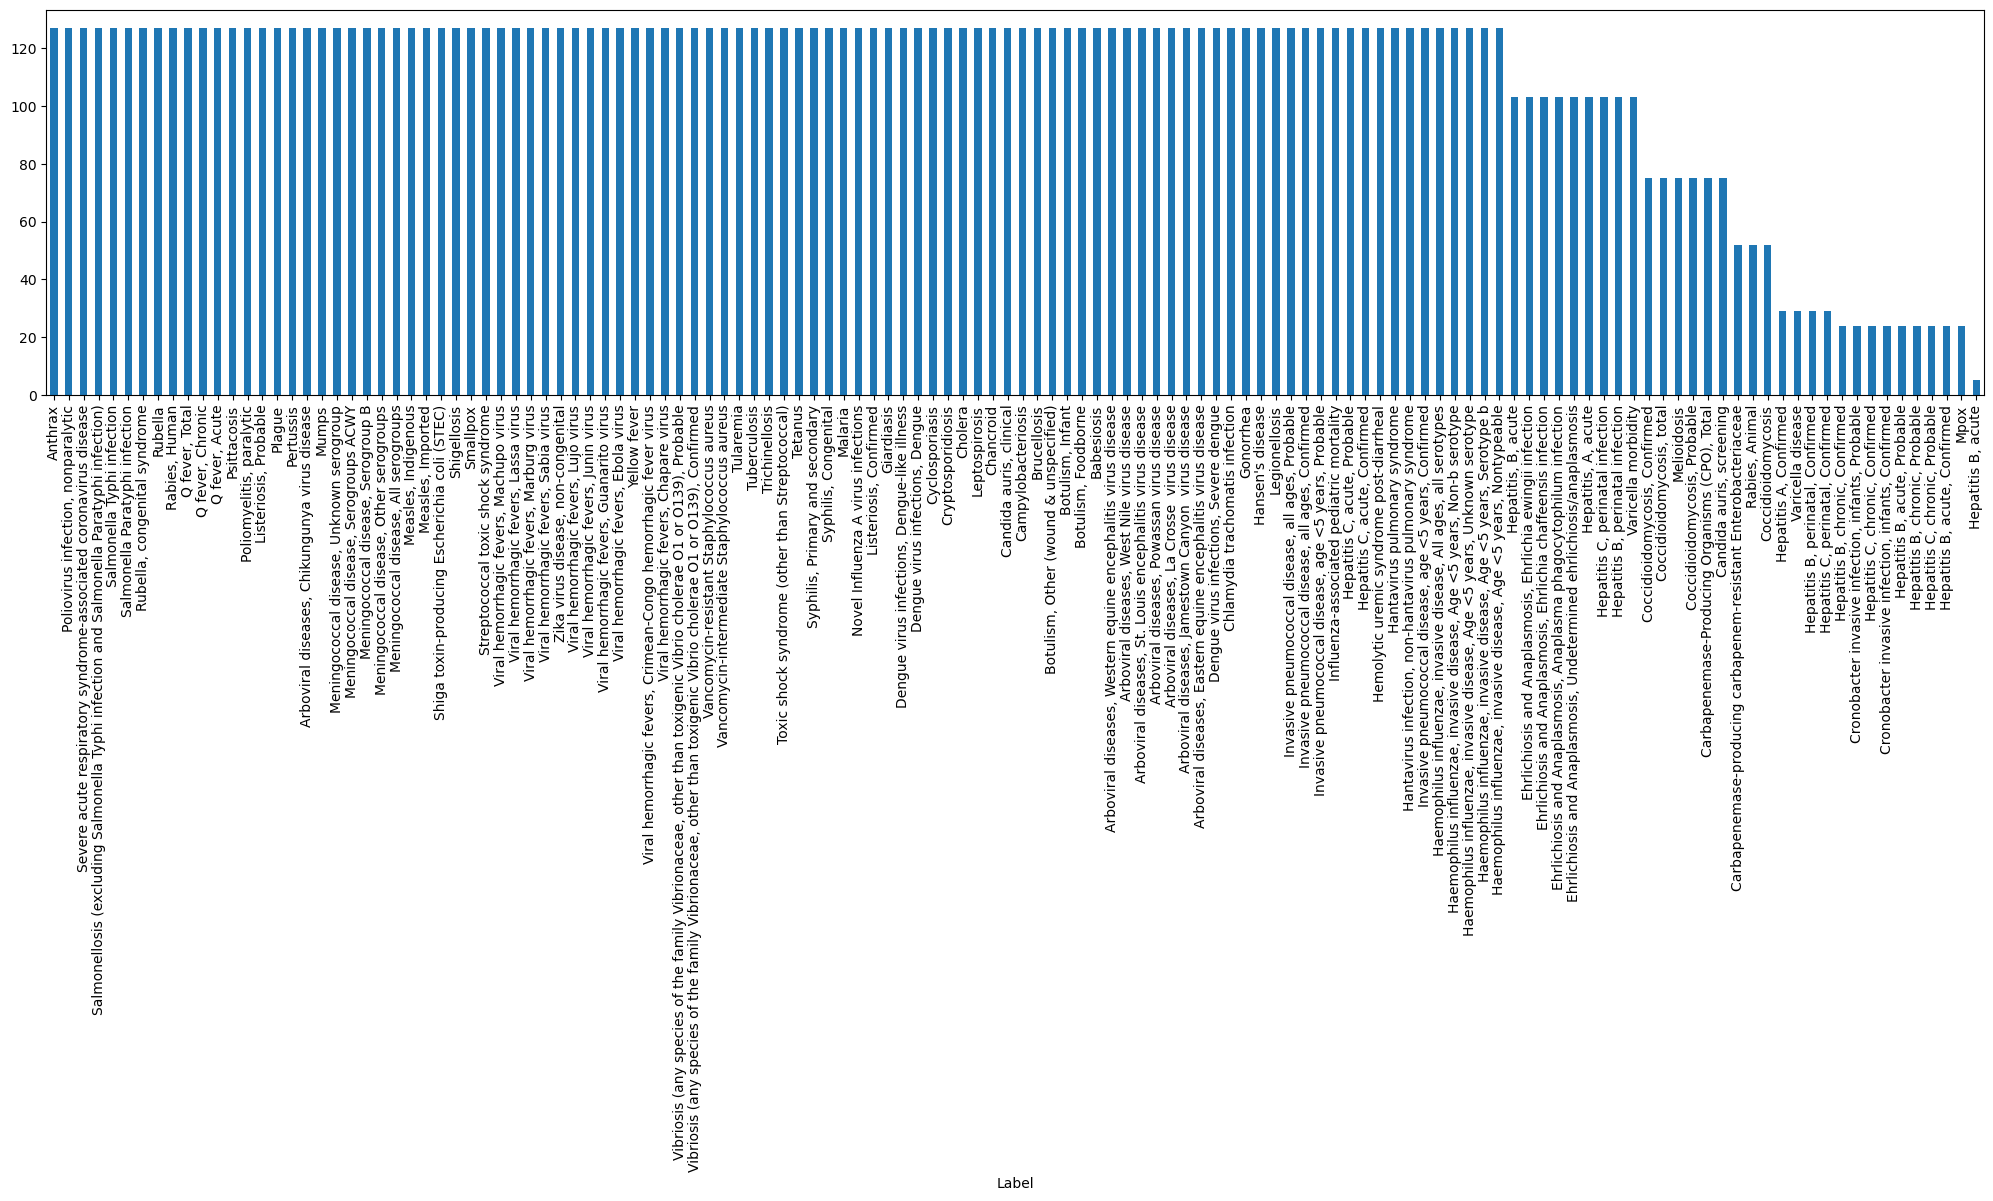

In [170]:
value_counts = df_disease_ohio['Label'].value_counts()
value_counts.plot(kind='bar',figsize=(25,5))


In [171]:
value_counts

Label
Anthrax                                                                                    127
Poliovirus infection, nonparalytic                                                         127
Severe acute respiratory syndrome-associated coronavirus disease                           127
Salmonellosis (excluding Salmonella Typhi infection and Salmonella Paratyphi infection)    127
Salmonella Typhi infection                                                                 127
                                                                                          ... 
Hepatitis B, chronic, Probable                                                              24
Hepatitis C, chronic, Probable                                                              24
Hepatitis B, acute, Confirmed                                                               24
Mpox                                                                                        24
Hepatitis B, acute                          

In [172]:
df_disease_ohio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14316 entries, 17 to 1002110
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Reporting Area                           14316 non-null  object        
 1   Current MMWR Year                        14316 non-null  int64         
 2   MMWR WEEK                                14316 non-null  int64         
 3   Label                                    14316 non-null  object        
 4   Current week                             2025 non-null   float64       
 5   Current week, flag                       14316 non-null  object        
 6   Previous 52 week Max                     13097 non-null  float64       
 7   Previous 52 weeks Max, flag              14316 non-null  object        
 8   Cumulative YTD Current MMWR Year         6875 non-null   float64       
 9   Cumulative YTD Current MMWR Year, flag   

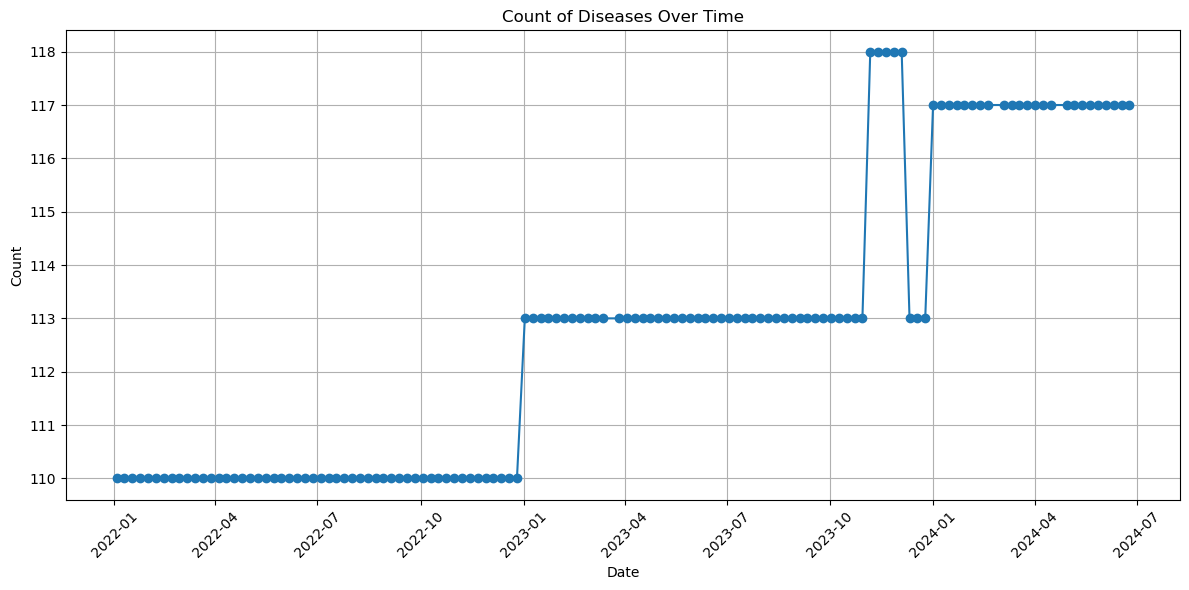

In [175]:
label_counts = df_disease_ohio.groupby('date')['Label'].count()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(label_counts.index, label_counts.values, marker='o', linestyle='-')
plt.title('Count of Diseases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




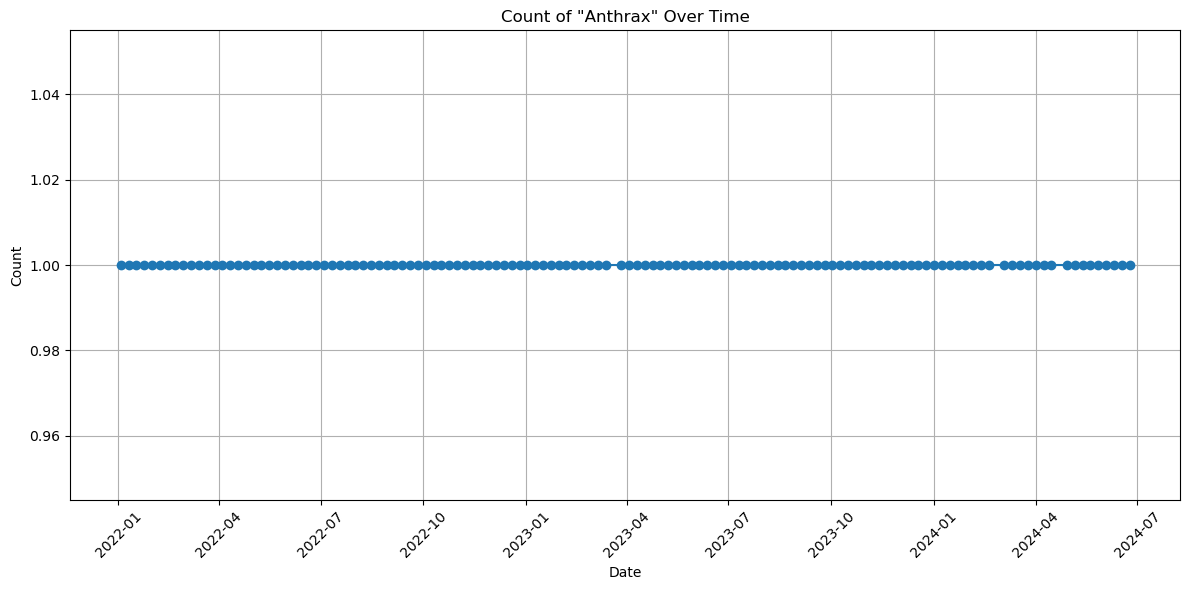

In [180]:
specific_label = 'Anthrax'
filtered_df = df_disease_ohio[df_disease_ohio['Label'] == specific_label]
label_counts = filtered_df.groupby('date')['Label'].count()
plt.figure(figsize=(12, 6))
plt.plot(label_counts.index, label_counts.values, marker='o', linestyle='-')
plt.title(f'Count of "{specific_label}" Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()